<a href="https://colab.research.google.com/github/haebarassi/DeepLearing/blob/main/K_Means%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means

In [135]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [136]:
dataset = np.array([[ 1.658985,  4.285136],
       [-3.453687,  3.424321],
       [ 4.838138, -1.151539],
       [-5.379713, -3.362104],
       [ 0.972564,  2.924086],
       [-3.567919,  1.531611],
       [ 0.450614, -3.302219],
       [-3.487105, -1.724432],
       [ 2.668759,  1.594842],
       [-3.156485,  3.191137],
       [ 3.165506, -3.999838],
       [-2.786837, -3.099354],
       [ 4.208187,  2.984927],
       [-2.123337,  2.943366],
       [ 0.704199, -0.479481],
       [-0.39237 , -3.963704],
       [ 2.831667,  1.574018],
       [-0.790153,  3.343144],
       [ 2.943496, -3.357075],
       [-3.195883, -2.283926],
       [ 2.336445,  2.875106],
       [-1.786345,  2.554248],
       [ 2.190101, -1.90602 ],
       [-3.403367, -2.778288],
       [ 1.778124,  3.880832],
       [-1.688346,  2.230267],
       [ 2.592976, -2.054368],
       [-4.007257, -3.207066],
       [ 2.257734,  3.387564],
       [-2.679011,  0.785119],
       [ 0.939512, -4.023563],
       [-3.674424, -2.261084],
       [ 2.046259,  2.735279],
       [-3.18947 ,  1.780269],
       [ 4.372646, -0.822248],
       [-2.579316, -3.497576],
       [ 1.889034,  5.1904  ],
       [-0.798747,  2.185588],
       [ 2.83652 , -2.658556],
       [-3.837877, -3.253815],
       [ 2.096701,  3.886007],
       [-2.709034,  2.923887],
       [ 3.367037, -3.184789],
       [-2.121479, -4.232586],
       [ 2.329546,  3.179764],
       [-3.284816,  3.273099],
       [ 3.091414, -3.815232],
       [-3.762093, -2.432191],
       [ 3.542056,  2.778832],
       [-1.736822,  4.241041],
       [ 2.127073, -2.98368 ],
       [-4.323818, -3.938116],
       [ 3.792121,  5.135768],
       [-4.786473,  3.358547],
       [ 2.624081, -3.260715],
       [-4.009299, -2.978115],
       [ 2.493525,  1.96371 ],
       [-2.513661,  2.642162],
       [ 1.864375, -3.176309],
       [-3.171184, -3.572452],
       [ 2.89422 ,  2.489128],
       [-2.562539,  2.884438],
       [ 3.491078, -3.947487],
       [-2.565729, -2.012114],
       [ 3.332948,  3.983102],
       [-1.616805,  3.573188],
       [ 2.280615, -2.559444],
       [-2.651229, -3.103198],
       [ 2.321395,  3.154987],
       [-1.685703,  2.939697],
       [ 3.031012, -3.620252],
       [-4.599622, -2.185829],
       [ 4.196223,  1.126677],
       [-2.133863,  3.093686],
       [ 4.668892, -2.562705],
       [-2.793241, -2.149706],
       [ 2.884105,  3.043438],
       [-2.967647,  2.848696],
       [ 4.479332, -1.764772],
       [-4.905566, -2.91107 ]])

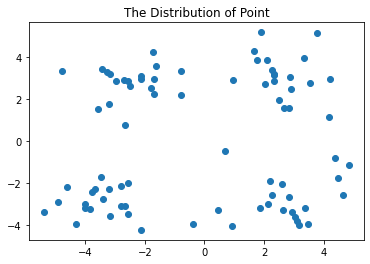

In [137]:
# 예제 데이터셋 시각화
plt.title("The Distribution of Point")
plt.scatter(dataset[:,0],dataset[:,1])
plt.show()

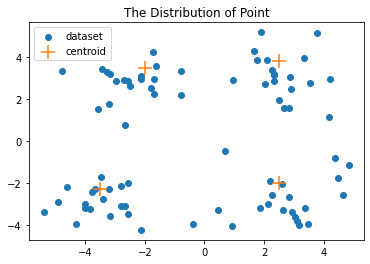

In [104]:
# 예제 데이터셋 시각화
plt.title("The Distribution of Point")
plt.scatter(dataset[:,0],dataset[:,1],label='dataset')
plt.scatter([-3.5,-2,2.5,2.5],[-2.3,3.5,3.8,-2],
            s=200, label="centroid", marker='+')
plt.legend()
plt.show()

4 개 중심점을 잘 잡아야 위 그림처럼 군집을 묶어줄 수 있다. 중심점과 데이터 간 거리를 구하고, 그 거리가 가장 작아지는 중심점을 찾도록 반복적 과정으로 중심점을 옮겨가는 과정이 K-Means 군집화.

# Numpy로 K-means 구현해보자
1. 초기 중심점으로 둘 K개의 점을 임의로 만들기
2. K개의 중심점과 각 데이터 사이의 거리 계산하기 
3. 각 데이터를 거리가 가장 가까운 군집으로 할당
4. 각 군집별 점들의 평균 계산 -> 군집의 중심점 다시 계산
5. 더이상 군집 바뀌지 않을 때까지 반복

### 1. 초기 중심점으로 둘 K개의 점을 임의로 만들기

Numpy의 np.random을 이용하면 데이터의 최소 최대값 범위 안에서 지정한 확률 분포에 따라 임의의 값을 추출할 수 있습니다. 예를 들어 위 데이터셋에서 axis=0축 데이터의 범위 안의 수를 동일한 확률로 뽑고 싶다면, 확률 분포를 연속균등분포(uniform)으로 설정하고 샘플링을 하면 됩니다.
``` np.random.uniform(low,high,size)```

In [138]:
center_x = np.random.uniform(np.min(dataset[:,0]), np.max(dataset[:,0]), 4)
center_y = np.random.uniform(np.min(dataset[:,1]), np.max(dataset[:,1]), 4)
centroids = np.stack([center_x,center_y],axis=-1)

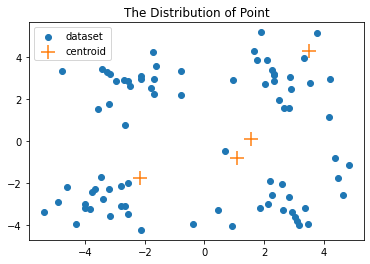

In [114]:
# 시각화
plt.title("The Distribution of Point")
plt.scatter(dataset[:,0],dataset[:,1],label='dataset')
plt.scatter(centroids[:,0],centroids[:,1],
            s=200, label="centroid", marker='+')
plt.legend()
plt.show()

### 2. K개의 중심점과 각 데이터 사이의 거리 계산하기



거리 공식은 KNN 때와 마찬가지로, 아래와 같습니다. 우리는 모든 중심점과 각 데이터 간 거리를 구해야 합니다.
Numpy Code의 reshape와 broadcasting을 활용하면 간결하게 나타낼 수 있습니다.

$$
point1 = (x_1,y_1), point2 = (x_2,y_2)\mbox{일 때}\\
distance\_between\_point1\_and\_point2 = \sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}
$$

In [140]:
datasetX = dataset[:,0].reshape(80,1)
datasetY = dataset[:,1].reshape(80,1)
centroidsX = centroids[:,0]
centroidsY = centroids[:,1]
datasetX

array([[ 1.658985],
       [-3.453687],
       [ 4.838138],
       [-5.379713],
       [ 0.972564],
       [-3.567919],
       [ 0.450614],
       [-3.487105],
       [ 2.668759],
       [-3.156485],
       [ 3.165506],
       [-2.786837],
       [ 4.208187],
       [-2.123337],
       [ 0.704199],
       [-0.39237 ],
       [ 2.831667],
       [-0.790153],
       [ 2.943496],
       [-3.195883],
       [ 2.336445],
       [-1.786345],
       [ 2.190101],
       [-3.403367],
       [ 1.778124],
       [-1.688346],
       [ 2.592976],
       [-4.007257],
       [ 2.257734],
       [-2.679011],
       [ 0.939512],
       [-3.674424],
       [ 2.046259],
       [-3.18947 ],
       [ 4.372646],
       [-2.579316],
       [ 1.889034],
       [-0.798747],
       [ 2.83652 ],
       [-3.837877],
       [ 2.096701],
       [-2.709034],
       [ 3.367037],
       [-2.121479],
       [ 2.329546],
       [-3.284816],
       [ 3.091414],
       [-3.762093],
       [ 3.542056],
       [-1.736822],


In [141]:
## numpy broadcasting 을 활용해 코드 한줄로 모든 centroids 와 모든 데이터간 거리를 계산하세요. 
dists = np.sqrt((datasetX-centroidsX)**2+(datasetY-centroidsY)**2)

In [142]:
dists.shape

(80, 4)

### 3. 각 데이터를 거리가 가장 가까운 군집으로 할당


In [143]:
dists

array([[ 8.37657747,  6.6479175 ,  1.52009367,  6.900535  ],
       [ 8.11155042,  8.1480634 ,  6.69658005,  3.10631904],
       [ 5.5886801 ,  2.78518296,  5.75601998,  8.99184711],
       [ 5.39362421,  7.7633012 , 11.52593355,  3.97148447],
       [ 6.9173993 ,  5.42315557,  2.63087322,  5.61106527],
       [ 6.50904893,  7.03706751,  7.31403677,  1.24717129],
       [ 0.77568941,  2.10223939,  8.13257709,  5.78898193],
       [ 4.10910728,  5.83338374,  9.02384151,  2.16289169],
       [ 6.13548363,  3.94113787,  2.81118053,  6.80368167],
       [ 7.77623706,  7.77309942,  6.44062421,  2.95072742],
       [ 3.18171964,  1.87376114,  8.35949777,  8.41368064],
       [ 2.89119468,  5.15919265,  9.55024142,  3.6840498 ],
       [ 8.09623331,  5.64247297,  1.71834111,  8.63719243],
       [ 7.18212412,  6.89264745,  5.48653804,  3.19848807],
       [ 3.517306  ,  2.45347711,  5.43444483,  4.80395048],
       [ 0.37935198,  3.16167069,  9.05651382,  5.65472146],
       [ 6.18997975,  3.

In [144]:
# np.argmin(): 최소값에 해당하는 인덱스를 반환
cluster_per_point = np.argmin(dists, axis=1)

In [145]:
cluster_per_point

array([2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 1, 0, 2, 3, 1, 0, 2, 2, 1, 3, 2, 3,
       1, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 1, 0, 2, 3, 1, 3, 2, 3, 1, 0,
       2, 3, 1, 3, 2, 3, 1, 0, 2, 3, 1, 3, 2, 3, 1, 0, 2, 3, 1, 3, 2, 3,
       1, 0, 2, 3, 1, 3, 2, 3, 1, 3, 2, 3, 1, 3])

###4. 각 군집별 점들의 평균 계산 -> 군집의 중심점 다시 계산


In [80]:
'''
# 각 군집에 해당하는 데이터들을 가져온 후 평균을 수행합니다. 
# cluster_index 가 1 인 데이터만 가져와 평균을 수행 
# (3+4)/2 를 수행하는 방법 ?

# where 함수는 해당하는 컨디션의 인덱스를 반환한다.

X = np.array([3, 4, 5, 6])
cluster_index = np.array([1, 1, 0 ,0])
mean = np.zeros(2)
k = 2
for i in range(k):
  target_point = X[np.where(cluster_index == i)]
  mean[i] = target_point.mean()
mean
'''

array([5.5, 3.5])

In [134]:
target_point

array([[-5.379713, -3.362104],
       [-3.487105, -1.724432],
       [-2.786837, -3.099354],
       [-0.39237 , -3.963704],
       [-3.195883, -2.283926],
       [-3.403367, -2.778288],
       [-4.007257, -3.207066],
       [-3.674424, -2.261084],
       [-2.579316, -3.497576],
       [-3.837877, -3.253815],
       [-2.121479, -4.232586],
       [-3.762093, -2.432191],
       [-4.323818, -3.938116],
       [-4.009299, -2.978115],
       [-3.171184, -3.572452],
       [-2.565729, -2.012114],
       [-2.651229, -3.103198],
       [-4.599622, -2.185829],
       [-2.793241, -2.149706],
       [-4.905566, -2.91107 ]])

In [151]:
#target_point.mean(axis =0)

array([-3.06443394,  0.58951959])

In [147]:
# 같은 index 군집에 포함된 데이터들끼리 모아서 평균을 계산한다.
k = 4
for i in range(k):
  # cluster_per_point가 i인 항목의 인덱스와 같은 인덱스를 가진 dataset을 가져온다.
  target_point = dataset[np.where(cluster_per_point == i)]
  # 가져온 dataset들의 평균을 내서 새로운 centorids[i]를 정의한다.
  centroids[i] = target_point.mean(axis = 0)

  # mean 에서 axis를 줘야 한다 ** 나중에 다시 보기

centroids

array([[-2.74271528, -2.74271528],
       [ 0.20455503,  0.20455503],
       [ 2.7918379 ,  2.7918379 ],
       [-1.23745717, -1.23745717]])

### 5. 더이상 군집 바뀌지 않을 때까지 반복

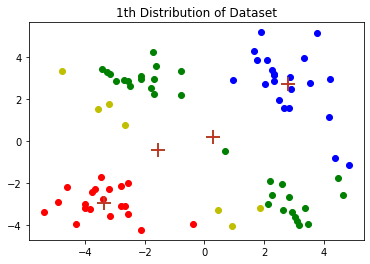

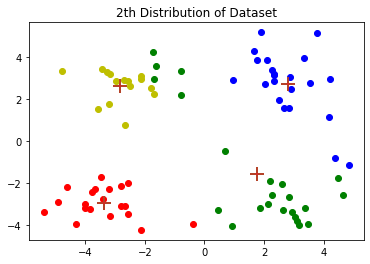

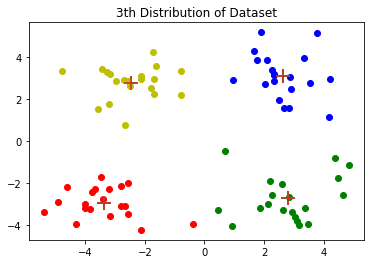

In [152]:
num_data = dataset.shape[0]

cluster_per_point = np.ones((num_data))

counter = 0
while True:
    prev_cluster_per_point = cluster_per_point
    
    # (2) 중심점과 각 데이터 사이의 거리를 계산
    datasetX = dataset[:,0].reshape(80,1)
    datasetY = dataset[:,1].reshape(80,1)
    centroidsX = centroids[:,0]
    centroidsY = centroids[:,1]

    dists = np.sqrt((datasetX-centroidsX)**2+(datasetY-centroidsY)**2)    
    # (3) 각 데이터를 거리가 가장 가까운 군집으로 할당
    cluster_per_point = np.argmin(dists, axis=1)
    # (4) 각 군집 별 점들의 평균을 계산 후, 군집의 중심점을 다시 계산
    k = 4
    for i in range(k):
      target_point = dataset[np.where(cluster_per_point == i)]
      centroids[i] = target_point.mean(axis=0)         
    
    ## (5) cluster 값이 변하지 않으면 while 구문을 종료(np.all 구문 사용)
    if np.all(prev_cluster_per_point == cluster_per_point):
        break
        
    # 시각화 코드 
    counter += 1
    plt.title("{}th Distribution of Dataset".format(counter))
    for idx, color in enumerate(['r','g','b','y']):
        mask = (cluster_per_point==idx)
        plt.scatter(dataset[mask,0],dataset[mask,1],
                    label='dataset', c=color)
        plt.scatter(centroids[:,0],centroids[:,1],
                    s=200, label="centroid", marker='+')
    plt.show()

# 전체 numpy code 작성하기

In [155]:
def cluster_kmeans(dataset, k):    
  center_x = np.random.uniform(np.min(dataset[:,0]), np.max(dataset[:,0]), 4)
  center_y = np.random.uniform(np.min(dataset[:,1]), np.max(dataset[:,1]), 4)
  centroids = np.stack([center_x,center_y],axis=-1) 
  num_data = dataset.shape[0]

  cluster_per_point = np.ones((num_data))

  counter = 0
  while True:
    prev_cluster_per_point = cluster_per_point
    
    # (2) 중심점과 각 데이터 사이의 거리를 계산
    datasetX = dataset[:,0].reshape(80,1)
    datasetY = dataset[:,1].reshape(80,1)
    centroidsX = centroids[:,0]
    centroidsY = centroids[:,1]

    dists = np.sqrt((datasetX-centroidsX)**2+(datasetY-centroidsY)**2)    
    # (3) 각 데이터를 거리가 가장 가까운 군집으로 할당
    cluster_per_point = np.argmin(dists, axis=1)
    # (4) 각 군집 별 점들의 평균을 계산 후, 군집의 중심점을 다시 계산
    for i in range(k):
      target_point = dataset[np.where(cluster_per_point == i)]
      centroids[i] = target_point.mean(axis=0)         
    
    ## (5) cluster 값이 변하지 않으면 while 구문을 종료(np.all 구문 사용)
    if np.all(prev_cluster_per_point == cluster_per_point):
        break
        
    # 시각화 코드 
    counter += 1
    plt.title("{}th Distribution of Dataset".format(counter))
    for idx, color in enumerate(['r','g','b','y']):
        mask = (cluster_per_point==idx)
        plt.scatter(dataset[mask,0],dataset[mask,1],
                    label='dataset', c=color)
        plt.scatter(centroids[:,0],centroids[:,1],
                    s=200, label="centroid", marker='+')
    plt.show()

    return centroids

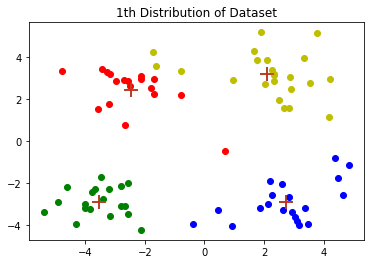

array([[-2.46571578,  2.45059206],
       [-3.53973889, -2.89384326],
       [ 2.7481024 , -2.90572575],
       [ 2.1037747 ,  3.1883033 ]])

In [156]:
cluster_kmeans(dataset,4)